# ATMO 5331 - Homework 1 - Fall 2021
## Due 7 Sep, 2021

Name: Jilliann Dufort

When doing this homework, remember that you have two jobs:
1. Make it work.
2. Clean it up so that I can understand what you've done. If you think I might not understand, document it with a comment or a function docstring.

You should present your work with a clear logical progression. If that seems like a hassle, remember that in doing so you are practicing skills that are expected in your thesis and journal publications.

You may work alone or in pairs. I will not be adjudicating relative level of effort in group work, so you are responsible for ensuring that you and your partner contribute equally.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

mcom_lon, mcom_lat = -101.8803718553, 33.5818617015
mcom_alt = 957.179

**1.** Create the 1D arrays `lon` and `lat`, centered on MCOM and incrementing by 5 degrees. There should be 7 longitude and 5 latitude values. (10 pts.)

The sample code also includes data array `d` with the shape (`nlat`, `nlon`), and defines some values so that we all have the same dataset. A plot of the data array in index coordintes is also included.

Together these arrays define the grid cell center locations and corresponding data values.

[-116.88037186 -111.88037186 -106.88037186 -101.88037186  -96.88037186
  -91.88037186  -86.88037186]
[23.5818617 28.5818617 33.5818617 38.5818617 43.5818617]


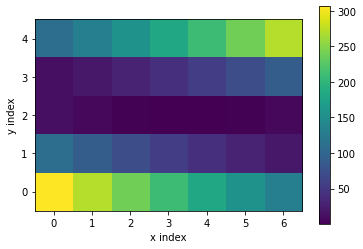

In [3]:
nlon = 7
nlat = 5
dlon, dlat = 5.0, 5.0

d = (np.arange(nlon*nlat) - (nlon*nlat/2.0))**2.0
d.shape = (nlat, nlon)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(d, origin='lower')
plt.colorbar(im)
ax.set_xlabel('x index')
ax.set_ylabel('y index')

lon = np.array([mcom_lon-3*dlon, mcom_lon-2*dlon, mcom_lon-dlon, mcom_lon, mcom_lon+dlon, mcom_lon+2*dlon, mcom_lon+3*dlon]) 
lat = np.array([mcom_lat-2*dlat, mcom_lat-dlat, mcom_lat, mcom_lat+dlat, mcom_lat+2*dlat]) 
print(lon)
print(lat)

**2.** Since the image is regularly gridded in lon/lat We can use the `extent` keyword argument to `imshow` to specify the bounds of the image, as you see below. Is this plot correct or incorrect? Explain how the `extent` keyword argument works using the language of centers, edges, and nodes. (10 pts.)

`print(ax.axis())` might be useful in understanding what you are seeing.

Text(0, 0.5, 'latitude (degrees)')

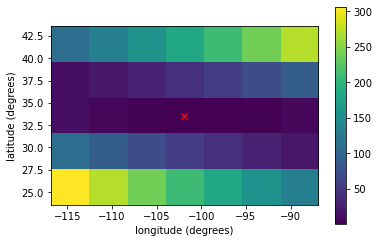

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

im = ax.imshow(d, origin='lower', extent=(lon.min(), lon.max(), lat.min(), lat.max()))
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

ANSWER:

**3.** Write a function that converts 1D center positions to edge positions. Use the closest adjacent spacing to extend the start and end of the array. Use this function to create two arrays `lat_edge` and `lon_edge` and print their values. Is the new figure created with `imshow` correct? Explain your answer. (20 pts.)

2.5
2.5
[-119.38037186 -114.38037186 -109.38037186 -104.38037186  -99.38037186
  -94.38037186  -89.38037186  -84.38037186]
[21.0818617 26.0818617 31.0818617 36.0818617 41.0818617 46.0818617]


Text(0, 0.5, 'latitude (degrees)')

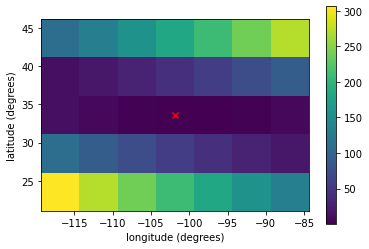

In [6]:
def centers_to_edges_1d(x):
    dx = np.absolute(x[1] - x[0])/2
    print(dx)
    return np.arange(np.min(x) - dx, np.max(x) + dx + dx/2, 2*dx)
    
lon_edge = centers_to_edges_1d(lon)
lat_edge = centers_to_edges_1d(lat)
print(lon_edge)
print(lat_edge)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(d, origin='lower', extent=(lon_edge.min(), lon_edge.max(), lat_edge.min(), lat_edge.max()))
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

ANSWER: Yes, it is correct. 

**4.** `imshow` works for the data so far because we have a regular grid with even spacing, so we only need to specify the corners. For a more general quadrilateral mesh, we can use `pcolormesh` to create a similar plot. What, if anything, is different about these plots compared to the first two? (10 pts.)

Text(0, 0.5, 'latitude (degrees)')

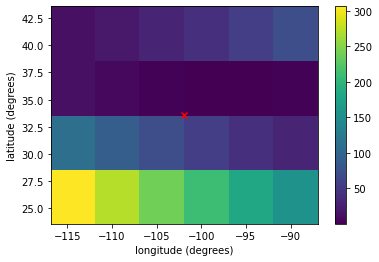

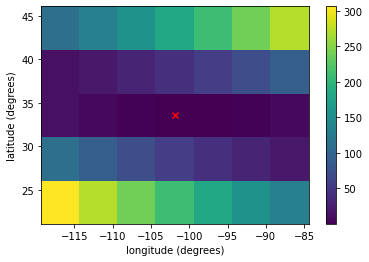

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(lon, lat, d)
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')


fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(lon_edge, lat_edge, d)
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

ANSWER:

**5.** So far, you have used 1D coordinate arrays, and things worked fine because the data were regularly gridded. `pcolormesh` will also accept 2D coordinate arrays. The function `np.meshgrid` creates 2D arrays from 1D arrays. Use `meshgrid` to create these 2D coordinate arrays and use them to make a plot of the data using `pcolormesh`. It should match the correct plot(s) above (20 pts.).

In [ ]:
np.meshgrid?

In [ ]:
lon_edge_2d, lat_edge_2d = np.meshgrid(lon_edge, lat_edge)
print(d)
print(lat_edge_2d)
print(lon_edge_2d)

# Your plots here, or in a new cell